In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [13]:
'''
state estimation
x(k+1) = sqrt(5+x(k)) + w(k)
y(k) = x(k)^3 + v(k)
'''

SigmaW = 1 # Process noise covariance
SigmaV = 2 # Sensor noise covariance
maxIter = 40

xtrue = 2 + np.random.rand(1)   # Initialize true system initial state
xhat = 2                        # Initialize Kalman filter initial estimate
SigmaX = 1                      # Initialize Kalman filter covariance
u = 0                           # Unknown initial driving input: assume zero

# % Reserve storage for variables we might want to plot/evaluate
xstore = [xtrue.item()]
xhatstore = []
SigmaXstore = []

for k in range(maxIter):
    Ahat = 0.5/np.sqrt(5+xhat)
    Bhat = np.array(1)

    # EKF Step 1: State estimate time update
    xhat = np.sqrt(5+xhat)

    # KF Step 2: Error covariance time update
    SigmaX = Ahat*SigmaX*Ahat.T + Bhat*SigmaW*Bhat.T
    
    # mean and standard deviation
    w = np.random.normal(0, np.sqrt(SigmaW), 1) 
    v = np.random.normal(0, np.sqrt(SigmaV), 1)
    ytrue = xtrue**3 + v
    xtrue = np.sqrt(5+xtrue) + w

    # KF Step 3: Estimate system output
    Chat = 3*xhat**2
    Dhat = np.array(1)
    yhat = xhat**3

    # KF Step 4: Compute Kalman gain matrix
    L = SigmaX*Chat.T/(Chat*SigmaX*Chat.T + Dhat*SigmaV*Dhat.T)

    # KF Step 5: State estimate measurement update
    xhat = xhat + L*(ytrue - yhat)
    xhat = np.maximum(-5,xhat)         # don't get square root of negative xhat!

    # KF Step 6: Error covariance measurement update
    SigmaX = SigmaX - L*Chat*SigmaX
    
    # store information
    xstore.append(xtrue.item())
    xhatstore.append(xhat.item())
    SigmaXstore.append(SigmaX.item())
    

xstore = np.array(xstore)
xhatstore = np.array(xhatstore)
SigmaXstore = np.array(SigmaXstore)


Text(0, 0.5, 'Estimation Error')

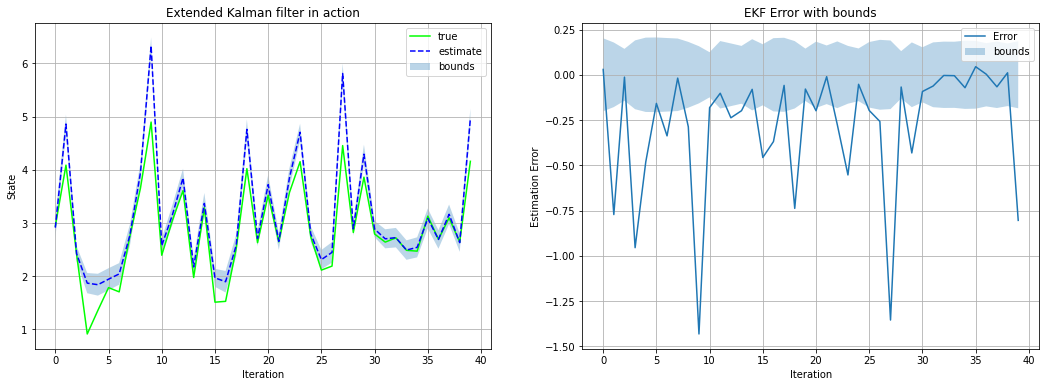

In [14]:
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
plt.plot(np.arange(maxIter),xstore[:maxIter],color=(0,1,0))
plt.plot(np.arange(maxIter),xhatstore,color=(0,0,1),linestyle='dashed')
plt.fill_between(np.arange(maxIter), xhatstore+3*np.sqrt(SigmaXstore), xhatstore-3*np.sqrt(SigmaXstore), alpha=0.3)
plt.grid()
plt.legend(['true','estimate','bounds'])
plt.title('Extended Kalman filter in action')
plt.xlabel('Iteration')
plt.ylabel('State')

plt.subplot(1,2,2)
estErr = xstore[:maxIter]-xhatstore 
bounds = 3*np.sqrt(SigmaXstore)
plt.plot(np.arange(maxIter), estErr)
plt.fill_between(np.arange(maxIter), bounds, -bounds, alpha=0.3)
plt.grid()
plt.legend(['Error','bounds'])
plt.title('EKF Error with bounds')
plt.xlabel('Iteration') 
plt.ylabel('Estimation Error')

In [104]:
# Compute rms error
np.sqrt(np.mean(estErr**2))

0.7381747898938372

In [105]:
# Compute fraction of estimates outside of 3-sigma bounds
sum(abs(estErr)>bounds)/maxIter

0.475

In [106]:
np.min(abs(estErr))

0.014819086603306442